# **Graded Challenge 1**



# **Introduction**

**Halo!**  

saya **Zidny Yasrah Sallum**, student di Hacktiv8 Batch RMT-20. 

Saya akan menganalisa dataset yang diberikan pada graded challenge yang pertama ini, saya harap output yang saya berikan sesuai dengan kriteria penilaian.



## Latar Belakang

Dataset yang diberikan adalah berbagai informasi tentang perkembangan kasus covid-19 dari berbagai negara.

informasi dataset yang diberikan berupa state, country, date, latitude dan longitude, location_geom, confirmed, deaths, recovered, active, fips code, admin, dan combined_key yang berisi admin, state dan country.

dataset ini mengandung 4264080 baris!, dikarenakan luasnya dataset yang diberikan, banyak yang bisa dilakukan dalam data ini seperti melihat tingkat kematian, perkembangan kasus covid-19, bahkan sesuatu seperti melihat perbandingan performa negara dalam menangani kasus covid-19.

## Problem Statement
* Negara dengan jumlah penduduk yang terinfeksi covid-19 tertinggi dan terendah.
* Perkembangan kasus covid-19 dari waktu ke waktu di setiap negara.
* Indonesia vs US dalam menangani kasus covid-19 



# **Import Library**

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Data Loading**



Berikut query yang saya pakai di bigquery untuk mengambil beberapa data dari dataset yang diberikan

SELECT 

 country_region, date, confirmed, deaths, recovered, active

FROM

  `bigquery-public-data.covid19_jhu_csse_eu.summary`;






Saya hanya mengambil beberapa kolom dari dataset seperti country_region, date, confirmed, deaths, recovered, active dikarenakan tabel yang lain tidak berkaitan dengan problem statement yang saya miliki. Hasil dataset dari query tersebut saya export ke drive dan disave ke local.

In [93]:
# Menggunakan library pandas untuk read file csv
df = pd.read_csv('h8dsft_P0GC1_Zidny_Yasrah_Sallum.csv')

In [94]:
# Untuk memastikan saya mendownload semua data dari hasil query
df.shape

(4264080, 6)

In [95]:
# Melihat 5 baris pertama dari dataset
df.head()

,country_region,date,confirmed,deaths,recovered,active
0,US,2020-05-15,3.0,0.0,0.0,3.0
1,US,2020-05-15,88.0,0.0,0.0,88.0
2,US,2020-05-15,695.0,23.0,0.0,672.0
3,US,2020-05-15,1.0,0.0,0.0,1.0
4,US,2020-05-15,8.0,0.0,0.0,8.0


In [96]:
# Melihat 5 baris terakhir dari dataset
df.tail()

,country_region,date,confirmed,deaths,recovered,active
4264075,US,2022-09-29,165502.0,577.0,NaN,NaN
4264076,US,2022-09-29,3136.0,52.0,NaN,NaN
4264077,US,2022-09-29,2211.0,15.0,NaN,NaN
4264078,US,2022-09-29,14073.0,124.0,NaN,NaN
4264079,US,2022-09-29,19382.0,146.0,NaN,NaN


Dari tail dan head dataset diatas, country_region berisikan hanya 'US', sebenarnya saya belum tahu apakah data ini hanya mengandung country region hanya dari US atau mengandung seluruh data negara, untuk itu saya ingin melihat daftar negara yang ada di dataset ini

In [97]:
# Menampilkan unique value dari kolom country_region
print(df['country_region'].unique())

# Menampilkan jumlah unique value dari kolom country_region
print('\nJumlah negara adalah : ', end=' ')
print(df['country_region'].nunique())

['US' 'Italy' 'United Kingdom' 'China' 'Germany' 'Spain' 'Netherlands'
 'Canada' 'Denmark' 'Angola' 'Austria' 'Bhutan' 'Bolivia' 'Brazil'
 'Cambodia' 'Cyprus' 'Czechia' 'Djibouti' 'Dominica' 'Gabon' 'Georgia'
 'Guyana' 'Hungary' 'Indonesia' 'Japan' 'Lithuania' 'Luxembourg'
 'Maldives' 'Malta' 'Nigeria' 'North Macedonia' 'Oman'
 'Saint Vincent and the Grenadines' 'Tunisia' 'Western Sahara' 'Yemen'
 'Albania' 'Belgium' 'Bosnia and Herzegovina' 'Botswana' 'Chile'
 'Colombia' 'Congo (Brazzaville)' 'Cuba' 'Finland' 'France' 'Ghana'
 'Haiti' 'India' 'Korea, North' 'Malaysia' 'Mexico' 'Nicaragua' 'Niger'
 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Russia'
 'Sao Tome and Principe' 'Saudi Arabia' 'South Africa' 'South Sudan'
 'Summer Olympics 2020' 'Sweden' 'Tajikistan' 'Timor-Leste' 'Ukraine'
 'West Bank and Gaza' 'Zambia' 'Iran' 'Mainland China' 'Switzerland'
 'Iceland' 'Israel' 'Croatia' 'Estonia' 'Macau' 'New Zealand'
 'Saint Barthelemy' 'Australia' 'Gibraltar' 'Liechtenstein' 'Nepal'
 

Dalam dataset diatas, terdapat total 252 negara

saya melakukan sedikit riset untuk melihat total negara di dunia. Dikutip dari website nationsonline.org, 

"Today there are 195 recognized sovereign states on the planet, the two countries which are not members of the United Nations are Palestine and Vatican City (they are so-called observer states). The IMF, the International Monetary Fund, lists on its "Country Data Profile" page 237 countries, without distinction, whether it is a sovereign country or a dependent territory. The United Nations' "UN/LOCODE Code List by Country and Territory" lists 248 countries and territories; the list also includes Antarctica."

**jumlah negara 252 adalah angka yang terbilang aneh, dari data unique diatas terlihat secara sekilas ada country bernama Winter Olympics 2022, Summer Olympics 2020, dan Diamond Princess yang merupakan nama kapal pesiar!**

# **Data Cleaning**

### **Column Manipulation**

Untuk mencapai solusi dari problem statement, concern pertama saya adalah menghapus isi dari country_region yang bukan negara.

In [98]:
# Value di country_region yang bukan merupakan negara
negara = ['Winter Olympics 2022', 'Summer Olympics 2020', 'Diamond Princess', 'MS Zaandam']

# Mengexclude row dari country_region sesuai dengan value dari variable negara
df = df[df.country_region.isin(negara) == False]

# Menampilkan jumlah negara setelah dihapus
df['country_region'].nunique()

248

248 Negara sudah termasuk standar dari "The United Nations' "UN/LOCODE Code List by Country and Territory" lists 248 countries and territories;" 

lanjut ke perubahan nama kolom dikarenakan nama kolom yang lumayan panjang

In [99]:
# Merubah nama province_state menjadi state dan country_region menjadi country 
df.rename(columns={'country_region' : 'country'}, inplace=True)

# Menampilkan kolom pada dataframe
df.columns

Index(['country', 'date', 'confirmed', 'deaths', 'recovered', 'active'], dtype='object')

Nama kolom yang sudah enak dilihat, selanjutnya apa **masing-masing features** dan juga **"expected types"** dari kolom dataset ini?

Header | Features | Data Type 
---|---|---
`country` | Nama Negara | string atau object
`date` | tanggal | datetime atau object
`confirmed` | Pasien yang dikonfirmasi terinfeksi virus covid-19 | integer
`deaths` | Pasien yang meninggal dunia akibat virus covid-19 | integer
`recovered` | Pasien yang sembuh dari covid-19 | integer
`active` | Pasien yang masih terinfeksi Covid-19  | integer

In [100]:
# Melihat tipe data dari masing-masing kolom
df.dtypes

country       object
date          object
confirmed    float64
deaths       float64
recovered    float64
active       float64
dtype: object

Pada `confirmed`, `deaths`, `recovered`, `active` tipe data merupakan float. Kolom tersebut harusnya berisikan data individu manusia yang tidak mungkin berisi angka desimal. Oleh karena itu saya ingin merubah tipe datanya menjadi integer. 

In [101]:
# Mengubah tipe data pada kolom menggunakan astype()
df = df.astype({'confirmed' : pd.Int64Dtype(), 'deaths' : pd.Int64Dtype(), 'recovered' : pd.Int64Dtype(), 'active' : pd.Int64Dtype()})

untuk `country`, tipe data objek sudah benar. Sedangkan `date` akan saya ubah menjadi datetime

In [102]:
# Mengubah tipe data pada kolom date menjadi datetime
df['date'] = pd.to_datetime(df['date'])

### **Missing Values**

untuk melihat apa saja missing values dari dataset ini, saya akan menggunakan kombinasi `isnull()` dan `sum()`

In [103]:
# Menampilkan jumlah data yang null
print(df.isnull().sum())

country            1
date               0
confirmed         19
deaths           442
recovered    2826348
active       2834427
dtype: int64


Saya akan meghapus 1 nilai null dari kolom `country` dengan menghapus barisnya menggunakan `dropna()`

In [104]:
# Menghapus row dari colom country_region yang mengandung NaN
df = df.dropna(subset=['country'])

dan juga akan menghapus 19 null values dari kolom `confirmed` dengan cara yang sama

In [105]:
# Menghapus row dari colom confirmed yang mengandung NaN
df = df.dropna(subset=['confirmed'])

sekarang, untuk nilai dari kolom `deaths` saya akan fill datanya dengan `fillna()`, dan untuk mendapatkan value yang akan diisi bisa didapatkan dengan menggunakan rumus `deaths` = `confirmed` - (`recovered` + `active`) 

In [106]:
# Menggunakan fillna() untuk mengisi NaN pada kolom deaths
df['deaths'].fillna(df.confirmed - (df.recovered + df.active), inplace = True)

In [107]:
# Melihat jumlah null value dari kolom deaths yang sudah diisi
print(df.isnull().sum())

country            0
date               0
confirmed          0
deaths           422
recovered    2826329
active       2834408
dtype: int64


Ternyata null values dari kolom `deaths` masih sama yaitu 442. Artinya data pada baris yang ada Null di kolom `deaths` juga memiliki nilai Null pada kolom `active` dan `recovered`

Dikarenakan null values dari kolom `death` tidak terlalu banyak, maka saya akan drop baris yang terdapat Nullnya

In [108]:
# Menghapus row dari colom confirmed yang mengandung NaN
df = df.dropna(subset=['deaths'])

Yang terakhir adalah pada kolom `recovered` dan kolom `active`, 

Dikarenakan kedua kolom tersebut banyak yang berisi null dan tidak terlalu berkaitan dengan problem statement saya miliki, lebih baik saya drop kedua kolom tersebut dan membuat kolom baru bernamakan `alive` yang berisikan gabungan dari kolom `active` dan `recovered`. Untuk menghilangkan null values, pengisian kolom `alive` bisa dilakukan dengan cara `alive` = `confirmed` - `deaths`   

In [109]:
# Menghapus kolom active dan recovered
df = df.drop(['active','recovered'], axis = 1)

# Membuat kolom baru bernama alive yang valuenya didapat dari confirmed - deaths
df['alive'] = df['confirmed'] - df['deaths']

In [110]:
# Menampilkan 5 row teratas dari dataframe
df.head()

,country,date,confirmed,deaths,alive
0,US,2020-05-15,3,0,3
1,US,2020-05-15,88,0,88
2,US,2020-05-15,695,23,672
3,US,2020-05-15,1,0,1
4,US,2020-05-15,8,0,8


Jika dilihat dari kolom `date` diatas, country US memiliki data dengan tanggal yang sama. Hal itu dikarenakan sebelumnya data itu dimiliki oleh kolom `state` yang tidak saya ambil dari datasetnya. 

Untuk merapikan datanya, saya akan menggabungkan value pada kolom `confirmed`, `deaths` dan `alive` pada tanggal yang sama untuk setiap country

In [111]:
# Menggabungkan value dari confirmed, deaths dan alive pada tanggal yang sama 
df = df.groupby(['country', 'date'], sort = False)[['confirmed', 'deaths', 'alive']].sum().reset_index()
# Menampilkan 5 row teratas dari dataframe
df.head()

,country,date,confirmed,deaths,alive
0,US,2020-05-15,1442824,87530,1355294
1,Italy,2020-05-15,223885,31610,192275
2,United Kingdom,2020-05-15,238004,34078,203926
3,China,2020-05-15,84038,4637,79401
4,Germany,2020-05-15,175233,7897,167336


Sekarang, saya akan lihat apakah masih ada null valuenya

In [112]:
# Melihat jumlah null value dari dataframe 
print(df.isnull().sum())

country      0
date         0
confirmed    0
deaths       0
alive        0
dtype: int64


Sudah tidak terdapat missing value pada dataframe.

# **Exploring the Data**

Untuk pembukaan, saya ingin melihat data negara yang penduduknya paling banyak terinfeksi covid-19 di awal pandemi yaitu tahun 2020

In [113]:
# Mengkonversi tanggal yang baru dibuat ke datetime, untuk menyamakan tipe data dari kolom date yang merupakan datetime
tanggal_awal = pd.to_datetime('2020-01-01')
tanggal_akhir = pd.to_datetime('2020-12-31')

# Query dengan kondisi date di tahun 2020, dan mengroup country berdasarkan nilai max dari kolom confirmed
terinfeksi = df.query("@tanggal_awal <= date <= @tanggal_akhir").groupby('country')['confirmed'].max().reset_index()

# Mengurutkan value confirmed dari yang tertinggi
terinfeksi = terinfeksi.sort_values('confirmed', ascending = False)

# Melihat 5 data teratas dari dataframe terinfeksi yang baru dibuat
terinfeksi.head()

,country,confirmed
221,US,19968087
98,India,10266674
26,Brazil,7675973
175,Russia,3127347
72,France,2677666


19 Juta jiwa manusia terinfeksi covid-19 di US pada tahun 2020

Selanjutnya untuk menyelesaikan problem statement yg pertama, saya akan melihat negara yang penduduknya terinfeksi covid-19 terbanyak dan yang paling sedikit, untuk mengetahuinya bisa menggunakan `df.query()`

In [114]:
# Membuat variable baru dari dataframe dengan mengambil nilai terendah dan tertinggi dari kolom confirmed
tertinggi = df.query("confirmed == confirmed.max()")
terendah = df.query("confirmed == confirmed.min()")

# Membuat variable baru untuk melihat index ke 0 dari data tertinggi
negara_tertinggi = tertinggi['country'].iloc[0]
jumlah_tertinggi = tertinggi['confirmed'].iloc[0]

# Membuat variable baru untuk melihat index ke 0 dari data terendah
negara_terendah = terendah['country'].iloc[0]
jumlah_terendah = terendah['confirmed'].iloc[0]

# Print hasil
print(f'Negara dengan infeksi covid-19 tertinggi adalah negara {negara_tertinggi} dengan total {jumlah_tertinggi} manusia')
print(f'Negara dengan infeksi covid-19 terendah adalah negara {negara_terendah} dengan total {jumlah_terendah} manusia')

Negara dengan infeksi covid-19 tertinggi adalah negara US dengan total 103802702 manusia
Negara dengan infeksi covid-19 terendah adalah negara Palau dengan total 0 manusia


Whoa, sebanyak 103.802.702 jiwa manusia di US terinfeksi covid-19. Jika dibandingkan dengan populasinya, itu sama dengan **31.27%** orang!


Saya akan memvisualisasikan perkembangan kasusnya

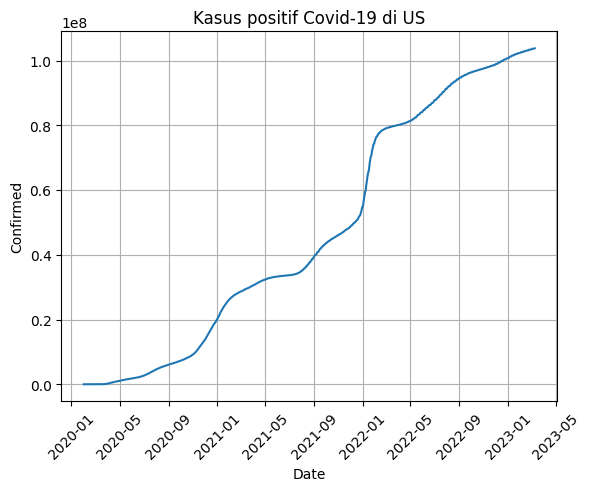

In [115]:
# Membuat variable baru untuk menampung country dari US
us = df.query("country == 'US'")

# Menggabungkan date dengan maksimal value dari kolom confirmed
terinfeksi_us = us.groupby('date')['confirmed'].sum()

# Membuat plot
plt.plot(terinfeksi_us.index,terinfeksi_us.values)

# Membuat label pada plot
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Confirmed')
plt.title('Kasus positif Covid-19 di US')

# Menambah grid pada plot
plt.grid(True)

# Menampilkan plot
plt.show()


Setelah melihat yang dari US, saya juga ingin melihat perkembangan kasus covid-19 dari waktu ke waktu di setiap negara.

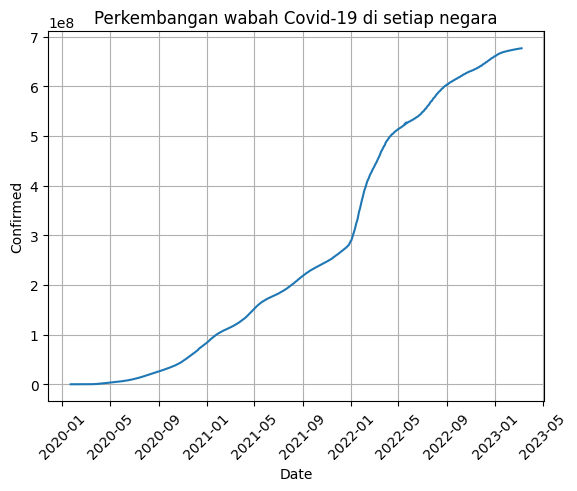

In [116]:
# Membuat variabel baru dengan menggabungkan total manusia yang terinfeksi
terinfeksi = df.groupby('date')['confirmed'].sum()

# Membuat plot dari tanggal sebagai indexnya dan nilai maksimal confirmed sebagai valuenya
plt.plot(terinfeksi.index, terinfeksi.values)

# Membuat label pada plot
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Confirmed')
plt.title('Perkembangan wabah Covid-19 di setiap negara')

# Menambah grid pada plot
plt.grid(True)

# Menampilkan plot
plt.show()

 Pada tahun 2022, terdapat lonjakan tinggi di bulan 1 sampai bulan 5

Sekarang, saya ingin melihat urutan negara dengan jumlah kematian terbanyak akibat covid-19

In [117]:
# Mengroup data berdasarkan country dan mencari nilai maximum dari kolom deaths
group = df.groupby('country')['deaths'].max().reset_index()

# Mengurutkan dataframe dari yang terbesar 
negara_tertinggi = group.sort_values('deaths', ascending=False)

# melihat hasil dataframe baru
negara_tertinggi.head()

,country,deaths
133,Malaysia,1917085
229,US,1123836
27,Brazil,699276
99,India,530779
181,Russia,388478


Untuk memvisualisasikan hasilnya :

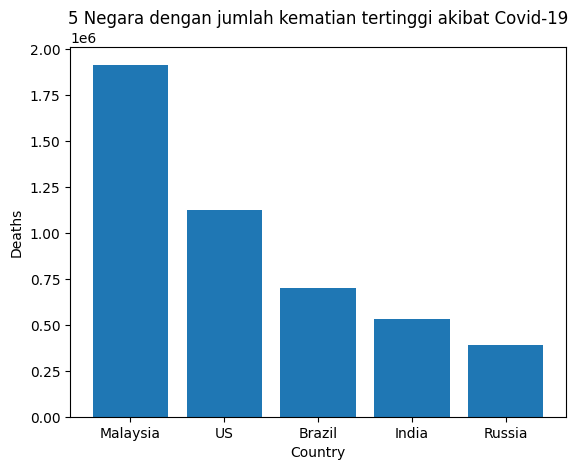

In [118]:
# Mengambil 5 data diatas menggunakan iloc()
negara_tertinggi = negara_tertinggi.iloc[0:5, :]

# Membuat plot bar dari data negara tertinggi tadi
plt.bar(negara_tertinggi['country'], negara_tertinggi['deaths'])

# Membuat label pada plot
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.title('5 Negara dengan jumlah kematian tertinggi akibat Covid-19')

# Menampilkan plot
plt.show()

Malaysia berada paling atas degan jumlah kematian mencapai 1.917.085, lumayan aneh but gapapa. Saya akan lanjut ke problem statement terakhir saya yaitu melihat peforma Indonesia vs US dalam menangani kasus covid-19

Peforma dilihat dengan banyaknya jumlah kematian, dibandingkan dengan jumlah populasi penduduk

In [119]:
# variable untuk menampung jumlah populasi penduduk dari negara Indonesia dan US di tahun 2022
penduduk_indonesia = 275770000
penduduk_us = 334870000

# Membuat clone dari dataframe untuk menyimpan data yang countrynya Indonesia dan US
indonesia = df.query("country == 'Indonesia'")
us = df.query("country == 'US'")

# Mengambil nilai dari kolom deaths tertinggi di data indonesia dan us
indonesia = indonesia['deaths'].max()
us = us['deaths'].max()

# Menghitung berapa persen dari penduduk yang meninggal akibat covid-19
total_indonesia = indonesia / penduduk_indonesia * 100
total_us = us / penduduk_us *100

# Membulatkan hasil 
total_indonesia = round(total_indonesia,2)
total_us = round(total_us,2)

# Menampilkan hasil
print(f'Kematian di indonesia akibat covid-19 yaitu {total_indonesia}% dari jumlah penduduk')
print(f'Kematian di US akibat covid-19 yaitu {total_us}% dari jumlah penduduk')

Kematian di indonesia akibat covid-19 yaitu 0.06% dari jumlah penduduk
Kematian di US akibat covid-19 yaitu 0.34% dari jumlah penduduk


Selanjutnya saya akan visualisasi hasilnya

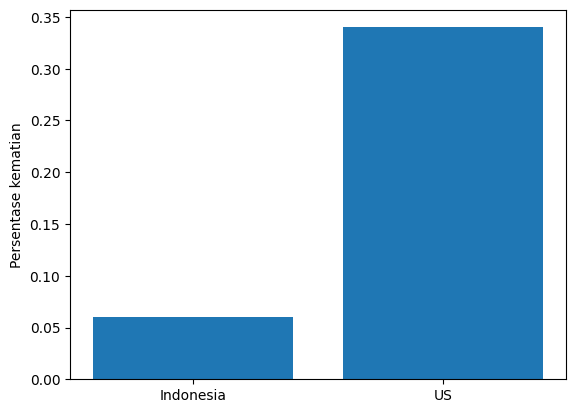

In [120]:
# Membuat list untuk menampung nilai x dan y
x = ['Indonesia', 'US']
y = [total_indonesia, total_us]

# Label pada x dan y
plt.ylabel('Negara')
plt.ylabel('Persentase kematian')

# Membuat bar plot pada x dan y
plt.bar(x,y)

# Menampilkan plotnya
plt.show()

# **Conclusion**




Siapa yang lebih baik dalam penanganan wabah covid-19? Indonesia atau US ? 


* US Mempunyai sistem kesehatan yang maju dengan rumah sakit dan fasilitas medis yang canggih.
* US merupakan negara yang sangat berpengaruh dalam penelitian dan pengembangan vaksin covid-19
* US memiliki pengalaman dalam menangani pandemi-pandemi sebelumnya


Jika dilihat dari perbandingan tingkat kematian dengan jumlah penduduk, Indonesia memang lebih baik dari US dalam menangani wabah covid-19. 
Namun, tentu saja ada faktor-faktor lain yang bisa menyebabkan US memiliki tingkat kematian lebih tinggi dari Indonesia

salah satunya adalah US merupakan negara maju yang dimana penduduknya memiliki mobilitas dan interaksi sosial yang tinggi, Menyebabkan penyebaran virus yang luas dan lebih sulit untuk dikendalikan.